In [1]:
#Import Pandas

import pandas as pd

In [2]:
#Load the data 

voc_training=pd.read_csv('Voc_training.csv', encoding="latin1", sep=';')
voc_training.head()

,Bundesland,Ausbildungsbereich,Geschlecht,Auszubildende Alter,2018,2017,2016,2015,2014,2013,2012
0,Land Berlin,Industrie und Handel,männlich,15 und jünger,1,3,2,4,2,2,3
1,Land Berlin,Industrie und Handel,männlich,16,335,264,317,315,223,229,233
2,Land Berlin,Industrie und Handel,männlich,17,795,815,786,662,705,803,773
3,Land Berlin,Industrie und Handel,männlich,18,1504,1372,1220,1216,1305,1262,1251
4,Land Berlin,Industrie und Handel,männlich,19,1819,1717,1692,1796,1653,1678,1759


In [3]:
#Transforming from wide to long format

voc_training["id"] = voc_training.index

print(voc_training.keys()[0:4])

voc_training_long=pd.wide_to_long(voc_training, stubnames=['20'], 
                                  i='id', 
                                  j='year')
voc_training_long.head(n=10)

#Renaming the '20'column to a meaningful name, 'Anzahl', which means number 

voc_training_long.rename(columns={'20':'Anzahl'}, inplace=True)
voc_training_long.head(n=10)

Index(['Bundesland', 'Ausbildungsbereich', 'Geschlecht',
       'Auszubildende Alter'],
      dtype='object')


,,Bundesland,Auszubildende Alter,Geschlecht,Ausbildungsbereich,Anzahl
id,year,,,,,
0,18,Land Berlin,15 und jünger,männlich,Industrie und Handel,1
1,18,Land Berlin,16,männlich,Industrie und Handel,335
2,18,Land Berlin,17,männlich,Industrie und Handel,795
3,18,Land Berlin,18,männlich,Industrie und Handel,1504
4,18,Land Berlin,19,männlich,Industrie und Handel,1819
5,18,Land Berlin,20,männlich,Industrie und Handel,1945
6,18,Land Berlin,21,männlich,Industrie und Handel,1805
7,18,Land Berlin,22,männlich,Industrie und Handel,1378
8,18,Land Berlin,23,männlich,Industrie und Handel,991


In [8]:
#Change strings '-' to Zero  

voc_training_long['Anzahl'].loc[voc_training_long['Anzahl']=='-']='0'
#voc_training_long['Anzahl'].loc[voc_training_long['Anzahl']=='0']

We can now distinguish between the different years and how things changed. 

In [9]:
#Cast to numeric 

print(voc_training_long['Anzahl'].dtype)
voc_training_long=voc_training_long.astype({'Anzahl': 'float'})

summed_up_people=voc_training_long.groupby(['year', 'Bundesland'])[['Anzahl']].sum()
print(summed_up_people)

object
                        Anzahl
year Bundesland               
12   Land Berlin       44682.0
     Land Brandenburg  30045.0
13   Land Berlin       42030.0
     Land Brandenburg  27338.0
14   Land Berlin       40496.0
     Land Brandenburg  26265.0
15   Land Berlin       39342.0
     Land Brandenburg  26017.0
16   Land Berlin       38633.0
     Land Brandenburg  25876.0
17   Land Berlin       38432.0
     Land Brandenburg  25946.0
18   Land Berlin       38649.0
     Land Brandenburg  26159.0


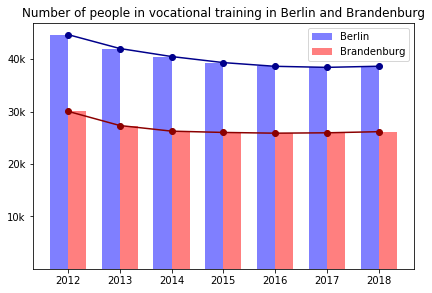

In [44]:
# Create a chart that compares number of vocational training numbers in both regions 

import numpy as np

#Set a bar width
bar_width=0.35

#Create bar charts for the different Bundeslaender
rectangle_berlin=plt.bar(summed_up_people_berlin['year'],
                        summed_up_people_berlin['Anzahl'], 
                        bar_width, 
                         color='b',
                        label='Berlin', 
                        alpha=0.5)

rectangle_brb=plt.bar(summed_up_people_brb['year']+bar_width,
                        summed_up_people_brb['Anzahl'], 
                        bar_width, 
                      color='r', 
                        label='Brandenburg', 
                        alpha=0.5)

# Add additional line plots to show trend
plt.plot(summed_up_people_berlin['year']+bar_width/2, summed_up_people_berlin['Anzahl'], color='darkblue', marker='o', 
        label='_nolegend_')
plt.plot(summed_up_people_brb['year']+bar_width/2, summed_up_people_brb['Anzahl'], color='darkred', marker='o', 
        label='_nolegend_')

#Adjust the x axis labels 
plt.xticks(summed_up_people_brb['year'] + bar_width / 2, ('2012', '2013', '2014', '2015', '2016', '2017', '2018'))
plt.yticks([10000, 20000, 30000, 40000], ('10k', '20k', '30k', '40k'))

#Show the plot 
plt.legend()
plt.tight_layout()
plt.title('Number of people in vocational training in Berlin and Brandenburg')
plt.show()

In [71]:
#Show differences between sexes and type of vocational training 

numbers_by_sex_and_age=voc_training_long.groupby(['Geschlecht', 'Auszubildende Alter'])[['Anzahl']].sum()

numbers_by_sex_and_age=numbers_by_sex_and_age.reset_index()

numbers_by_sex_and_age.head()

,Geschlecht,Auszubildende Alter,Anzahl
0,männlich,15 und jünger,44.0
1,männlich,16,8986.0
2,männlich,17,23760.0
3,männlich,18,35347.0
4,männlich,19,40840.0


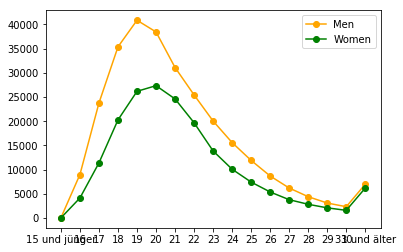

In [74]:
# Compare the age of men and women in the data 

plt.plot(numbers_by_sex_and_age[numbers_by_sex_and_age['Geschlecht']=='männlich']['Auszubildende Alter'], 
        numbers_by_sex_and_age[numbers_by_sex_and_age['Geschlecht']=='männlich']['Anzahl'], 
        color='orange', marker='o', label='Men')

plt.plot(numbers_by_sex_and_age[numbers_by_sex_and_age['Geschlecht']=='weiblich']['Auszubildende Alter'], 
        numbers_by_sex_and_age[numbers_by_sex_and_age['Geschlecht']=='weiblich']['Anzahl'], 
        color='green', marker='o', label='Women')

plt.legend()

plt.show()